In [1]:
!pip install numpy matplotlib python-opencv
!pip install ..\.

ERROR: Could not find a version that satisfies the requirement python-opencv (from versions: none)
ERROR: No matching distribution found for python-opencv


Processing c:\users\danii\program\python\project\imgplot2vec
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imgplot2vec: filename=imgplot2vec-0.0.2-py3-none-any.whl size=2756 sha256=0383e83bc8e0a02b9ddc3692552cc027546bf95fac335ab46dd032c8c976df4a
  Stored in directory: C:\Users\danii\AppData\Local\Temp\pip-ephem-wheel-cache-3pmpap3s\wheels\80\1b\12\a6cbd47a5901888451ae52a27d07e74be1cc9b7825954476a6
Successfully built imgplot2vec
  Attempting uninstall: imgplot2vec
    Found existing installation: imgplot2vec 0.0.1
    Uninstalling imgplot2vec-0.0.1:
      Successfully uninstalled imgplot2vec-0.0.1


In [28]:
import cv2
from imgplot2vec import Reader, Frame, Converter, AutoConverter
import matplotlib.pyplot as plt
import numpy as np

def delta_label(img):
    """
    Подробно смотри в разделе удаление подписи
    """
    delete_lebel_height = 30
    delete_lebel_width = 120
    h,w = img.shape[:2]
    img[:delete_lebel_height, w-delete_lebel_width:, :] = 255

In [30]:

reader = Reader()
converter = Converter()


img = reader.read(r"img/2.png")
delta_label(img)

frame = Frame(x_top_left=22, y_top_left=17, x_bottom_right=1635, y_bottom_right=535,
              x0=3, y0=0, x1=66, y1=3e+08)

vec_y, vec_x = converter.imgplot2vec(img, frame)

[4633204.63320464 1737451.73745173 1158301.15830117 ... 5212355.2123552
 5212355.2123552  5212355.2123552 ] [0.00000000e+00 3.90576565e-02 7.81153131e-02 ... 6.28828270e+01
 6.29218847e+01 6.29609423e+01]


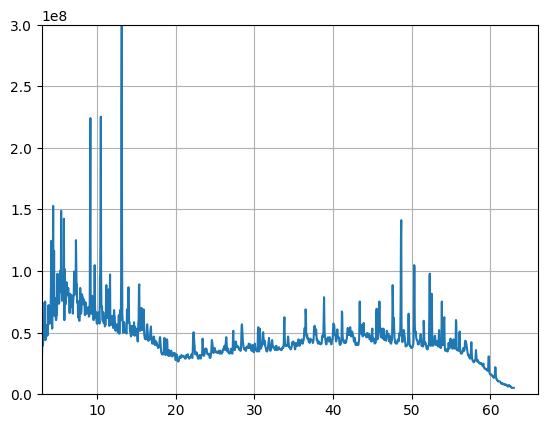

In [31]:
gray_frame = frame.crop_gray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
print(vec_y, vec_x)
plt.plot(vec_x, vec_y, "-")
plt.grid()
plt.xlim([frame.x0, frame.x1])
plt.ylim([frame.y0, frame.y1])
plt.show()

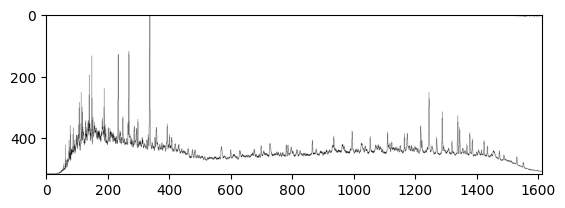

In [6]:
plt.imshow(gray_frame, cmap="gray")

### AutoConverter

In [32]:
reader = Reader()
auto_converter = AutoConverter()

img = reader.read(r"img/2.png")
delta_label(img)

vec_y, vec_x = auto_converter.auto_imgplot2vec(img)

[0.00187617 0.01313321 0.00375235 ... 0.01125704 0.01125704 0.01125704] [0.00000000e+00 6.07533414e-04 1.21506683e-03 ... 9.98177400e-01
 9.98784933e-01 9.99392467e-01]


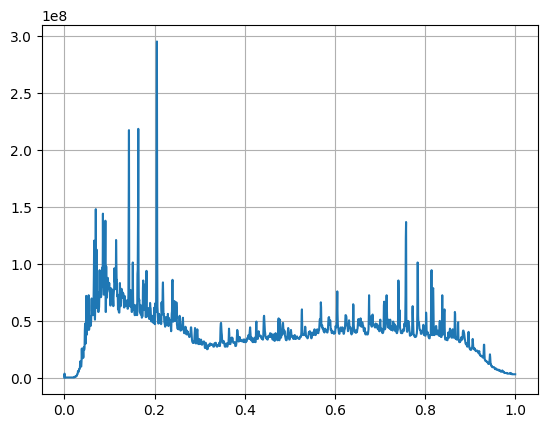

In [33]:
gray_frame = frame.crop_gray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
print(vec_y, vec_x)
plt.plot(vec_x, 3e+08*vec_y, "-")
plt.grid()
plt.show()

### Удаление подписи

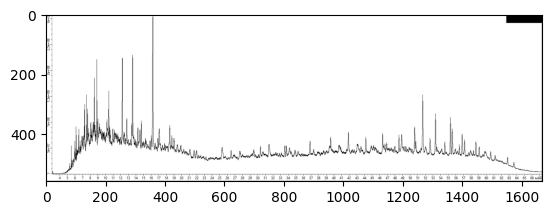

In [27]:
reader = Reader()

img = reader.read(r"img/2.png")

delete_lebel_height = 30
delete_lebel_width = 120
h,w = img.shape[:2]
img[:delete_lebel_height, w-delete_lebel_width:, :] = 0 # для того чтобы понять какая область 0
plt.imshow(img)